# Proyecto 2 - Proceso de generación de valor por extración de datos


Este proyecto esta diseñado para que usted pueda:

1.   Poner en práctica los conocimientos específicos del leguaje Python y las bibliotecas de Pandas, Matplotlib con Seaborn y numpy
2.   Generar una plantilla reutilizable de un proceso de limpieza, consolidación y carga de datos
3.   Aplicar los conocimientos analizando una base de datos del mundo real.

Utilizaremos el dataset superstore que puede encontar en la carpeta de datasets de Google Drive. Este es la información de ventas y ordenes de cuatro años de una tienda en línea y le permitirá hacer análisis de ventas, categorías etc.

Mantenga en mente que algunos errores en carga y limpieza de datos pueden surgir. Su tarea es identificarlos y sobreponerse a ellos.



In [1]:
import numpy as np # Algebra lineal
import pandas as pd # Manipulación y procesamiento de datos

import matplotlib.pyplot as plt #Visualización
import seaborn as sns #Visualización

from google.colab import drive

In [2]:
%matplotlib inline
#para que las visualizaciones se queden en un solo archivo y no se abra otra ventana

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importar Datos e Identificar variables a limpiar

In [33]:
SuperStore_1 = pd.read_csv('/content/drive/MyDrive/archive/superstore/superstore_dataset2011-2015-1.csv', encoding='latin-1')
SuperStore_2 = pd.read_csv('/content/drive/MyDrive/archive/superstore/superstore_dataset2011-2015-2.csv', encoding='latin-1')
SuperStore_3 = pd.read_csv('/content/drive/MyDrive/archive/superstore/superstore_dataset2011-2015-3.csv', encoding='latin-1')
SuperStore_4 = pd.read_csv('/content/drive/MyDrive/archive/superstore/superstore_dataset2011-2015-4.csv', encoding='latin-1')
SuperStore_5 = pd.read_csv('/content/drive/MyDrive/archive/superstore/superstore_dataset2011-2015-5.csv', encoding='latin-1')

In [34]:
SuperStore_1.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [35]:
SuperStore_2.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,45399,CG-2013-1870,6/9/2013,6/9/2013,Same Day,HD-4785,Harold Dahlen,Home Office,Lubumbashi,Katanga,...,OFF-IBI-10000080,Office Supplies,Binders,"Ibico Binder, Recycled",15.84,1,0.0,1.26,2.83,Medium


Agregando columna de indentificación a cada Dataframe

In [36]:
SuperStore_1['Store'] = '1'

In [37]:
SuperStore_1.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Store
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.3,2,0.0,106.14,35.46,Medium,1


In [38]:
SuperStore_2['Store'] = '2'
SuperStore_3['Store'] = '3'
SuperStore_4['Store'] = '4'
SuperStore_5['Store'] = '5'

In [39]:
SuperStore_2.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Store
0,45399,CG-2013-1870,6/9/2013,6/9/2013,Same Day,HD-4785,Harold Dahlen,Home Office,Lubumbashi,Katanga,...,Office Supplies,Binders,"Ibico Binder, Recycled",15.840,1,0.0,1.2600,2.83,Medium,2
1,38888,CA-2013-158778,6/9/2013,10/9/2013,Standard Class,DB-13210,Dean Braden,Consumer,Philadelphia,Pennsylvania,...,Furniture,Chairs,"Global Task Chair, Black",71.246,2,0.3,-19.3382,2.69,Medium,2
2,35912,CA-2013-144540,6/9/2013,11/9/2013,Standard Class,GH-14410,Gary Hansen,Home Office,Houston,Texas,...,Office Supplies,Fasteners,Advantus Map Pennant Flags and Round Head Tacks,28.440,9,0.2,4.2660,2.64,Medium,2
3,3045,MX-2013-141222,6/9/2013,6/9/2013,Same Day,JM-15865,John Murray,Consumer,Cancún,Quintana Roo,...,Office Supplies,Fasteners,"Advantus Staples, Assorted Sizes",11.080,2,0.0,4.9600,2.05,High,2
4,36243,CA-2013-151372,6/9/2013,7/9/2013,First Class,JH-15985,Joseph Holt,Consumer,Redondo Beach,California,...,Office Supplies,Fasteners,Advantus Push Pins,4.360,2,0.0,1.7876,2.00,Critical,2


Uniendo Dataframes

In [40]:
SuperStore = pd.concat([SuperStore_1, SuperStore_2, SuperStore_3, SuperStore_4, SuperStore_5], ignore_index = True)
SuperStore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Store
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,1
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,1
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,1
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,1
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,1


# Limpieza de Datos

Se identifican las columnas con valores nulos

In [42]:
SuperStore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

Se realiza una revisión de valores del codigo postal con la ubicación para ver si hay valores similares que se puedan usar

In [43]:
SuperStore[['City', 'State', 'Country', 'Postal Code']]

,City,State,Country,Postal Code
0,Constantine,Constantine,Algeria,NaN
1,Wagga Wagga,New South Wales,Australia,NaN
2,Budapest,Budapest,Hungary,NaN
3,Stockholm,Stockholm,Sweden,NaN
4,Wagga Wagga,New South Wales,Australia,NaN
...,...,...,...,...
51285,Fairfield,California,United States,94533.0
51286,Agadir,Souss-Massa-Draâ,Morocco,NaN
51287,Managua,Managua,Nicaragua,NaN
51288,Juárez,Chihuahua,Mexico,NaN


In [44]:
SuperStore.loc[SuperStore['State']=='Colorado']

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Store
229,32103,CA-2011-134313,1/11/2011,7/11/2011,Standard Class,RA-19915,Russell Applegate,Consumer,Denver,Colorado,...,Technology,Phones,ClearOne CHATAttach 160 - speaker phone,1983.968,4,0.2,247.9960,235.13,Medium,1
289,32102,CA-2011-134313,1/11/2011,7/11/2011,Standard Class,RA-19915,Russell Applegate,Consumer,Denver,Colorado,...,Office Supplies,Art,Model L Table or Wall-Mount Pencil Sharpener,43.176,3,0.2,4.3176,2.12,Medium,1
828,31498,CA-2011-133690,3/8/2011,5/8/2011,First Class,BS-11755,Bruce Stewart,Consumer,Denver,Colorado,...,Furniture,Tables,BoxOffice By Design Rectangular and Half-Moon ...,218.750,2,0.5,-161.8750,30.18,High,1
866,31499,CA-2011-133690,3/8/2011,5/8/2011,First Class,BS-11755,Bruce Stewart,Consumer,Denver,Colorado,...,Office Supplies,Appliances,"Bravo II Megaboss 12-Amp Hard Body Upright, Re...",2.600,1,0.2,0.2925,0.59,High,1
1109,38029,CA-2011-120096,4/7/2011,7/7/2011,First Class,KE-16420,Katrina Edelman,Corporate,Aurora,Colorado,...,Office Supplies,Paper,Xerox 194,177.536,4,0.2,62.1376,34.66,Critical,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50639,31801,US-2013-105578,31-05-2013,5/6/2013,Standard Class,MY-17380,Maribeth Yedwab,Corporate,Parker,Colorado,...,Office Supplies,Paper,"White Dual Perf Computer Printout Paper, 2700 ...",32.792,1,0.2,11.8871,1.92,Medium,5
50644,31798,US-2013-105578,31-05-2013,5/6/2013,Standard Class,MY-17380,Maribeth Yedwab,Corporate,Parker,Colorado,...,Office Supplies,Binders,GBC Standard Therm-A-Bind Covers,14.952,2,0.7,-11.9616,0.98,Medium,5
50648,31797,US-2013-105578,31-05-2013,5/6/2013,Standard Class,MY-17380,Maribeth Yedwab,Corporate,Parker,Colorado,...,Office Supplies,Binders,Vinyl Sectional Post Binders,22.620,2,0.7,-15.0800,0.72,Medium,5
50651,31800,US-2013-105578,31-05-2013,5/6/2013,Standard Class,MY-17380,Maribeth Yedwab,Corporate,Parker,Colorado,...,Office Supplies,Binders,Storex Flexible Poly Binders with Double Pockets,2.376,3,0.7,-1.9008,0.14,Medium,5


Se sutituyen los valores nulos por "No disponible"

In [45]:
SuperStore['Postal Code'] = SuperStore['Postal Code'].fillna('No disponible')

In [46]:
SuperStore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     51290 non-null  object 
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [47]:
SuperStore.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Store
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,1
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,1
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,1
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,1
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,1


In [49]:
SuperStore.groupby(['Product ID']).nunique()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Store
Product ID,,,,,,,,,,,,,,,,,,,,,
FUR-ADV-10000002,2,2,2,2,1,2,2,1,2,2,...,1,1,1,2,2,1,2,2,1,1
FUR-ADV-10000108,3,3,3,3,2,3,3,3,3,3,...,1,1,1,3,3,1,3,3,2,3
FUR-ADV-10000183,8,8,8,8,3,8,8,3,8,8,...,1,1,1,6,5,3,6,8,3,5
FUR-ADV-10000188,5,5,5,5,2,5,5,3,5,5,...,1,1,1,4,2,3,4,5,2,4
FUR-ADV-10000190,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TEC-STA-10004181,6,6,6,6,2,6,6,2,6,5,...,1,1,1,4,3,2,4,6,3,4
TEC-STA-10004536,5,5,5,5,2,5,5,3,5,5,...,1,1,1,2,2,1,2,5,2,4
TEC-STA-10004542,5,5,5,4,2,5,5,3,5,5,...,1,1,1,4,4,2,4,5,2,4


In [ ]:
SuperStore.isnull().sum()

# Creación de nueva base de datos en Google Drive

In [25]:
from google.colab import files

In [26]:
SuperStore.to_csv('SuperStore.csv', index=False)

files.download('SuperStore.csv') #Google Colab para descargar a computadora

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

CSV a Google Drive

In [27]:
path = '/content/drive/My Drive/archive/SuperStore.csv' # Creamos archivo y abrimos para escribir /write
with open(path, 'w', encoding = 'utf-8-sig') as f:
  SuperStore.to_csv(f)

# Explorando datos

Conectar a la nueva base de datos

In [6]:
Super_Store = pd.read_csv('/content/drive/MyDrive/archive/SuperStore.csv')

In [7]:
Super_Store.head()

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Store
0,0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,1
1,1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,1
2,2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,1
3,3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,1
4,4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,1


In [8]:
Super_Store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      51290 non-null  int64  
 1   Row ID          51290 non-null  int64  
 2   Order ID        51290 non-null  object 
 3   Order Date      51290 non-null  object 
 4   Ship Date       51290 non-null  object 
 5   Ship Mode       51290 non-null  object 
 6   Customer ID     51290 non-null  object 
 7   Customer Name   51290 non-null  object 
 8   Segment         51290 non-null  object 
 9   City            51290 non-null  object 
 10  State           51290 non-null  object 
 11  Country         51290 non-null  object 
 12  Postal Code     51290 non-null  object 
 13  Market          51290 non-null  object 
 14  Region          51290 non-null  object 
 15  Product ID      51290 non-null  object 
 16  Category        51290 non-null  object 
 17  Sub-Category    51290 non-null 

Explorando datos para segmentación

In [9]:
Super_Store['Category'].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

In [10]:
Super_Store['Sub-Category'].nunique()

17

In [11]:
Super_Store['Sub-Category'].unique()

array(['Storage', 'Supplies', 'Paper', 'Furnishings', 'Copiers',
       'Bookcases', 'Appliances', 'Art', 'Accessories', 'Binders',
       'Labels', 'Envelopes', 'Chairs', 'Machines', 'Tables', 'Phones',
       'Fasteners'], dtype=object)

In [12]:
Super_Store['Market'].unique()

array(['Africa', 'APAC', 'EMEA', 'EU', 'US', 'LATAM', 'Canada'],
      dtype=object)

In [13]:
Super_Store['Segment'].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [14]:
Super_Store['Product Name'].unique()

array(['Tenex Lockers, Blue', 'Acme Trimmer, High Speed',
       'Tenex Box, Single Width', ...,
       'Park Ridge Embossed Executive Business Envelopes',
       'Acco Glide Clips', 'Multimedia Mailers'], dtype=object)

In [15]:
Super_Store.groupby(['Sub-Category']).count()

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,...,Product ID,Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Store
Sub-Category,,,,,,,,,,,,,,,,,,,,,
Accessories,3075,3075,3075,3075,3075,3075,3075,3075,3075,3075,...,3075,3075,3075,3075,3075,3075,3075,3075,3075,3075
Appliances,1755,1755,1755,1755,1755,1755,1755,1755,1755,1755,...,1755,1755,1755,1755,1755,1755,1755,1755,1755,1755
Art,4883,4883,4883,4883,4883,4883,4883,4883,4883,4883,...,4883,4883,4883,4883,4883,4883,4883,4883,4883,4883
Binders,6152,6152,6152,6152,6152,6152,6152,6152,6152,6152,...,6152,6152,6152,6152,6152,6152,6152,6152,6152,6152
Bookcases,2411,2411,2411,2411,2411,2411,2411,2411,2411,2411,...,2411,2411,2411,2411,2411,2411,2411,2411,2411,2411
Chairs,3434,3434,3434,3434,3434,3434,3434,3434,3434,3434,...,3434,3434,3434,3434,3434,3434,3434,3434,3434,3434
Copiers,2223,2223,2223,2223,2223,2223,2223,2223,2223,2223,...,2223,2223,2223,2223,2223,2223,2223,2223,2223,2223
Envelopes,2435,2435,2435,2435,2435,2435,2435,2435,2435,2435,...,2435,2435,2435,2435,2435,2435,2435,2435,2435,2435
Fasteners,2420,2420,2420,2420,2420,2420,2420,2420,2420,2420,...,2420,2420,2420,2420,2420,2420,2420,2420,2420,2420


In [16]:
Super_Store.groupby(['Sub-Category']).count().sort_values(['Product ID'],ascending=False)

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,...,Product ID,Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Store
Sub-Category,,,,,,,,,,,,,,,,,,,,,
Binders,6152,6152,6152,6152,6152,6152,6152,6152,6152,6152,...,6152,6152,6152,6152,6152,6152,6152,6152,6152,6152
Storage,5059,5059,5059,5059,5059,5059,5059,5059,5059,5059,...,5059,5059,5059,5059,5059,5059,5059,5059,5059,5059
Art,4883,4883,4883,4883,4883,4883,4883,4883,4883,4883,...,4883,4883,4883,4883,4883,4883,4883,4883,4883,4883
Paper,3538,3538,3538,3538,3538,3538,3538,3538,3538,3538,...,3538,3538,3538,3538,3538,3538,3538,3538,3538,3538
Chairs,3434,3434,3434,3434,3434,3434,3434,3434,3434,3434,...,3434,3434,3434,3434,3434,3434,3434,3434,3434,3434
Phones,3357,3357,3357,3357,3357,3357,3357,3357,3357,3357,...,3357,3357,3357,3357,3357,3357,3357,3357,3357,3357
Furnishings,3170,3170,3170,3170,3170,3170,3170,3170,3170,3170,...,3170,3170,3170,3170,3170,3170,3170,3170,3170,3170
Accessories,3075,3075,3075,3075,3075,3075,3075,3075,3075,3075,...,3075,3075,3075,3075,3075,3075,3075,3075,3075,3075
Labels,2606,2606,2606,2606,2606,2606,2606,2606,2606,2606,...,2606,2606,2606,2606,2606,2606,2606,2606,2606,2606


# Analizando Categorías, tendencias, medias y creando valor

Su función será crear un "deep dive" que explorara 2 a 4 preguntas de negocios que pueda hacer con los datos: ¿Cuál es el mejor día de la semana de ventas? etc. Como mínimo su análisis debe incluir:

- Comparar dos variables con al menos una segmentación por categoría
- Analizar gráficamente multiples variables numéricas
- Plot charts, Gráficos de tendencia y Barra con su análisis de que significa
- Utilizar las ideas anteriores como sea necesario para cada pregunta de negocio.



In [17]:
import datetime

In [18]:
Super_Store['Order Date'] = Super_Store['Order Date'].apply(
    lambda x :
    x.replace('-','/'))

In [19]:
Super_Store['Order Date'] =pd.to_datetime(Super_Store['Order Date'],format ='%d/%m/%Y')

In [20]:
Super_Store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      51290 non-null  int64         
 1   Row ID          51290 non-null  int64         
 2   Order ID        51290 non-null  object        
 3   Order Date      51290 non-null  datetime64[ns]
 4   Ship Date       51290 non-null  object        
 5   Ship Mode       51290 non-null  object        
 6   Customer ID     51290 non-null  object        
 7   Customer Name   51290 non-null  object        
 8   Segment         51290 non-null  object        
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Postal Code     51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Region          51290 non-null  object        
 15  Pr

01. ¿Cual ha sido el volumen de ventas por subcategorias en el ultimo trimestre de 2014?

In [22]:
Super_Store.groupby(['Product Name']).count().sort_values(['Product ID'],ascending=False).head(10)

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,...,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Store
Product Name,,,,,,,,,,,,,,,,,,,,,
Staples,227,227,227,227,227,227,227,227,227,227,...,227,227,227,227,227,227,227,227,227,227
"Cardinal Index Tab, Clear",92,92,92,92,92,92,92,92,92,92,...,92,92,92,92,92,92,92,92,92,92
"Eldon File Cart, Single Width",90,90,90,90,90,90,90,90,90,90,...,90,90,90,90,90,90,90,90,90,90
"Rogers File Cart, Single Width",84,84,84,84,84,84,84,84,84,84,...,84,84,84,84,84,84,84,84,84,84
"Ibico Index Tab, Clear",83,83,83,83,83,83,83,83,83,83,...,83,83,83,83,83,83,83,83,83,83
"Sanford Pencil Sharpener, Water Color",80,80,80,80,80,80,80,80,80,80,...,80,80,80,80,80,80,80,80,80,80
"Smead File Cart, Single Width",77,77,77,77,77,77,77,77,77,77,...,77,77,77,77,77,77,77,77,77,77
"Stanley Pencil Sharpener, Water Color",75,75,75,75,75,75,75,75,75,75,...,75,75,75,75,75,75,75,75,75,75
"Acco Index Tab, Clear",75,75,75,75,75,75,75,75,75,75,...,75,75,75,75,75,75,75,75,75,75


In [24]:
Super_Store.sort_values(['Order Date'],ascending=False)

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Store
51289,51289,36388,CA-2014-156720,2014-12-31,4/1/2015,Standard Class,JM-15580,Jill Matthias,Consumer,Loveland,...,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.17,Medium,5
51243,51243,22880,IN-2014-78627,2014-12-31,4/1/2015,Standard Class,MG-17695,Maureen Gnade,Consumer,Jilin,...,Technology,Accessories,"Memorex Memory Card, Erganomic",300.240,3,0.0,84.0600,23.96,Medium,5
51256,51256,32204,CA-2014-143259,2014-12-31,4/1/2015,Standard Class,PO-18865,Patrick O'Donnell,Consumer,New York City,...,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279,9.67,High,5
51255,51255,44026,RS-2014-1460,2014-12-31,2/1/2015,Second Class,PB-9105,Peter Bühler,Consumer,Ufa,...,Furniture,Furnishings,"Rubbermaid Door Stop, Black",43.800,1,0.0,13.5600,9.81,High,5
51254,51254,9475,MX-2014-158827,2014-12-31,2/1/2015,First Class,TC-21535,Tracy Collins,Home Office,Chaguanas,...,Office Supplies,Appliances,"Cuisinart Blender, Silver",135.480,3,0.0,17.5800,10.93,Medium,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,5,22254,IN-2011-47883,2011-01-01,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,...,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.242,2,0.1,15.3420,1.80,Medium,1
4,4,22255,IN-2011-47883,2011-01-01,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium,1
3,3,11731,IT-2011-3647632,2011-01-01,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High,1
2,2,48883,HU-2011-1220,2011-01-01,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High,1


Creación de df Super_Store_1 con intervalo de tiempo del ultimo trimestre del 2014

In [81]:
# Super_Store_1 = Super_Store[
#    (Super_Store['Order Date'] >=datetime.datetime(year=2014,month=10,day=1))
#    ].groupby(['Product Name']).count().sort_values(['Product ID'],ascending=False).head(10)

Super_Store_1 = Super_Store[
    (Super_Store['Order Date'] >=datetime.datetime(year=2014,month=10,day=1))]

Super_Store_1

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Store
13517,13517,29668,IN-2014-15403,2014-10-01,6/10/2014,Standard Class,MC-17575,Matt Collins,Consumer,Bangkok,...,Furniture,Bookcases,"Safco Library with Doors, Pine",1971.3456,8,0.370,-813.6144,141.65,Medium,2
13518,13518,11750,ES-2014-5444640,2014-10-01,4/10/2014,First Class,FG-14260,Frank Gastineau,Home Office,Vienna,...,Technology,Copiers,"Brother Fax Machine, Color",319.9800,1,0.000,143.9700,103.90,Critical,2
13519,13519,7289,MX-2014-120733,2014-10-01,4/10/2014,First Class,JE-15745,Joel Eaton,Consumer,La Ceiba,...,Technology,Accessories,"Enermax Router, Erganomic",204.9120,2,0.400,-122.9680,82.23,Critical,2
13520,13520,28039,IN-2014-15872,2014-10-01,3/10/2014,Second Class,JL-15235,Janet Lee,Consumer,Kalyan,...,Office Supplies,Art,"BIC Canvas, Blue",375.9000,7,0.000,7.3500,46.57,Medium,2
13521,13521,7287,MX-2014-120733,2014-10-01,4/10/2014,First Class,JE-15745,Joel Eaton,Consumer,La Ceiba,...,Technology,Copiers,"Brother Personal Copier, Digital",284.1098,5,0.402,18.0098,38.77,Critical,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,51285,32593,CA-2014-115427,2014-12-31,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.9040,2,0.200,4.5188,0.89,Medium,5
51286,51286,47594,MO-2014-2560,2014-12-31,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.9900,1,0.000,0.4200,0.49,Medium,5
51287,51287,8857,MX-2014-110527,2014-12-31,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.4000,3,0.000,12.3600,0.35,Medium,5
51288,51288,6852,MX-2014-114783,2014-12-31,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.1200,1,0.000,0.5600,0.20,Medium,5


In [91]:
Super_Store_1['Sub-Category'].unique()

array(['Bookcases', 'Copiers', 'Accessories', 'Art', 'Paper', 'Chairs',
       'Phones', 'Binders', 'Fasteners', 'Envelopes', 'Labels',
       'Appliances', 'Storage', 'Furnishings', 'Tables', 'Machines',
       'Supplies'], dtype=object)

In [92]:
Super_Store_1.groupby('Sub-Category')['Sub-Category'].count()

Sub-Category
Accessories    337
Appliances     207
Art            552
Binders        712
Bookcases      284
Chairs         402
Copiers        269
Envelopes      275
Fasteners      274
Furnishings    367
Labels         286
Machines       191
Paper          431
Phones         389
Storage        570
Supplies       265
Tables         115
Name: Sub-Category, dtype: int64

In [93]:
Super_Store_1['Sub-Category'].nunique()

17

**Grafica de ventas por sub categorias del ultimo trimestre de 2014**

<Axes: xlabel='count', ylabel='Sub-Category'>

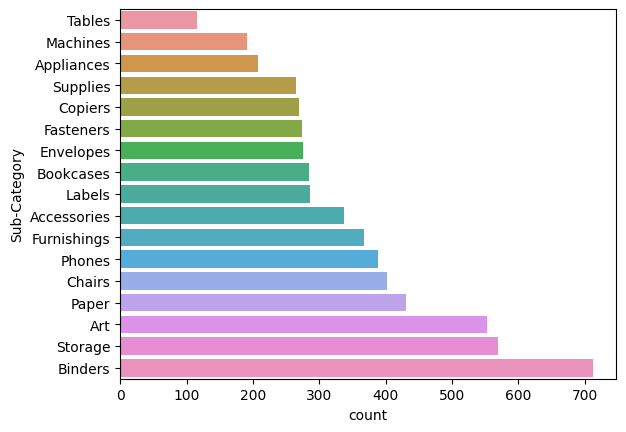

In [94]:
sns.countplot(y=Super_Store_1['Sub-Category'],order=Super_Store_1['Sub-Category'].value_counts(ascending=True).index )

**Grafica de ventas por subcategoria de los ultimos 4 años**

<Axes: xlabel='count', ylabel='Sub-Category'>

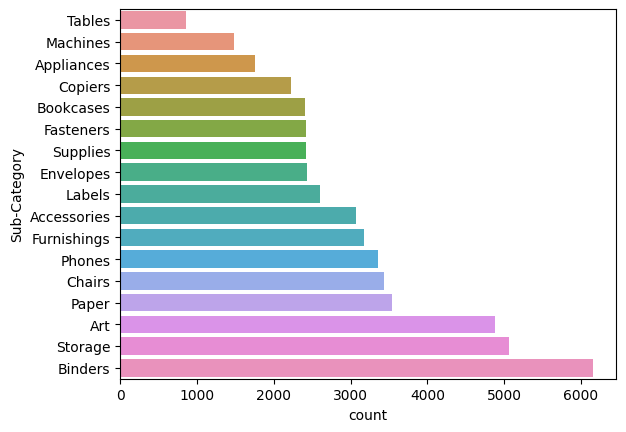

In [95]:
sns.countplot(y=Super_Store['Sub-Category'],order=Super_Store['Sub-Category'].value_counts(ascending=True).index )

Se observa que se ha seguido la tendencia de los ultimos años en la venta de las subcategorias, la cual tambien aplica para el ultimo trimestre del 2014

02. ¿Cuál ha sido el incremento de ventas que ha tenido la tienda en los ultimos años?

In [96]:
Super_Store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      51290 non-null  int64         
 1   Row ID          51290 non-null  int64         
 2   Order ID        51290 non-null  object        
 3   Order Date      51290 non-null  datetime64[ns]
 4   Ship Date       51290 non-null  object        
 5   Ship Mode       51290 non-null  object        
 6   Customer ID     51290 non-null  object        
 7   Customer Name   51290 non-null  object        
 8   Segment         51290 non-null  object        
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Postal Code     51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Region          51290 non-null  object        
 15  Pr

In [100]:
Super_Store[(Super_Store['Order Date'] >=datetime.datetime(year=2014,month=1,day=1))]

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Store
13206,13206,10407,ES-2014-2774938,2014-01-01,3/1/2014,Second Class,FH-14350,Fred Harton,Consumer,Pantin,...,Technology,Machines,"Okidata Printer, Red",677.4075,3,0.15,-111.6225,104.69,High,2
13207,13207,21092,IN-2014-47134,2014-01-01,5/1/2014,Standard Class,KN-16450,Kean Nguyen,Corporate,Melbourne,...,Technology,Machines,"Konica Inkjet, Wireless",846.2880,3,0.10,46.9980,46.20,Medium,2
13208,13208,17503,IT-2014-4810734,2014-01-01,3/1/2014,Second Class,AS-10240,Alan Shonely,Consumer,Cergy,...,Technology,Phones,"Nokia Office Telephone, with Caller ID",332.1630,6,0.15,-43.1370,37.85,Critical,2
13209,13209,37638,US-2014-105830,2014-01-01,3/1/2014,First Class,DB-13660,Duane Benoit,Consumer,Lancaster,...,Office Supplies,Storage,Tennsco Industrial Shelving,156.5120,4,0.20,-35.2152,30.66,High,2
13210,13210,32450,CA-2014-160395,2014-01-01,7/1/2014,Standard Class,KL-16555,Kelly Lampkin,Corporate,Reno,...,Office Supplies,Binders,Lock-Up Easel 'Spel-Binder',159.7680,7,0.20,53.9217,26.90,Low,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,51285,32593,CA-2014-115427,2014-12-31,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.9040,2,0.20,4.5188,0.89,Medium,5
51286,51286,47594,MO-2014-2560,2014-12-31,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.9900,1,0.00,0.4200,0.49,Medium,5
51287,51287,8857,MX-2014-110527,2014-12-31,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.4000,3,0.00,12.3600,0.35,Medium,5
51288,51288,6852,MX-2014-114783,2014-12-31,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.1200,1,0.00,0.5600,0.20,Medium,5


In [103]:
sum(Super_Store['Sales'])

12642501.909880234

In [107]:
Super_Store_2014 = Super_Store[(Super_Store['Order Date'] >=datetime.datetime(year=2014,month=1,day=1))]
Super_Store_2014

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Store
13206,13206,10407,ES-2014-2774938,2014-01-01,3/1/2014,Second Class,FH-14350,Fred Harton,Consumer,Pantin,...,Technology,Machines,"Okidata Printer, Red",677.4075,3,0.15,-111.6225,104.69,High,2
13207,13207,21092,IN-2014-47134,2014-01-01,5/1/2014,Standard Class,KN-16450,Kean Nguyen,Corporate,Melbourne,...,Technology,Machines,"Konica Inkjet, Wireless",846.2880,3,0.10,46.9980,46.20,Medium,2
13208,13208,17503,IT-2014-4810734,2014-01-01,3/1/2014,Second Class,AS-10240,Alan Shonely,Consumer,Cergy,...,Technology,Phones,"Nokia Office Telephone, with Caller ID",332.1630,6,0.15,-43.1370,37.85,Critical,2
13209,13209,37638,US-2014-105830,2014-01-01,3/1/2014,First Class,DB-13660,Duane Benoit,Consumer,Lancaster,...,Office Supplies,Storage,Tennsco Industrial Shelving,156.5120,4,0.20,-35.2152,30.66,High,2
13210,13210,32450,CA-2014-160395,2014-01-01,7/1/2014,Standard Class,KL-16555,Kelly Lampkin,Corporate,Reno,...,Office Supplies,Binders,Lock-Up Easel 'Spel-Binder',159.7680,7,0.20,53.9217,26.90,Low,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,51285,32593,CA-2014-115427,2014-12-31,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.9040,2,0.20,4.5188,0.89,Medium,5
51286,51286,47594,MO-2014-2560,2014-12-31,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.9900,1,0.00,0.4200,0.49,Medium,5
51287,51287,8857,MX-2014-110527,2014-12-31,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.4000,3,0.00,12.3600,0.35,Medium,5
51288,51288,6852,MX-2014-114783,2014-12-31,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.1200,1,0.00,0.5600,0.20,Medium,5


In [113]:
sum(Super_Store['Sales'])

12642501.909880234

In [109]:
sum(Super_Store[(Super_Store['Order Date'] >=datetime.datetime(year=2014,month=1,day=1))]['Sales'])

4299865.870559989

In [149]:
data = [[2011, sum(Super_Store[(Super_Store['Order Date'] >=datetime.datetime(year=2011,month=1,day=1)) & (Super_Store['Order Date'] <=datetime.datetime(year=2012,month=1,day=1))]['Sales'])],
                     [2012, sum(Super_Store[(Super_Store['Order Date'] >=datetime.datetime(year=2012,month=1,day=1)) & (Super_Store['Order Date'] <=datetime.datetime(year=2013,month=1,day=1))]['Sales'])],
                     [2013, sum(Super_Store[(Super_Store['Order Date'] >=datetime.datetime(year=2013,month=1,day=1)) & (Super_Store['Order Date'] <=datetime.datetime(year=2014,month=1,day=1))]['Sales'])],
                     [2014, sum(Super_Store[(Super_Store['Order Date'] >=datetime.datetime(year=2014,month=1,day=1)) & (Super_Store['Order Date'] <=datetime.datetime(year=2015,month=1,day=1))]['Sales'])]
                     ]

datos = [[10, 11, 12, 13],
         [20, 21, 22, 23],
         [30, 31, 32, 33]]

columnas = ['Año', 'Ventas'] # definimos los nombres de las columnas
filas = ['F1', 'F2', 'F3'] # definimos los nombres de las filas

Super_Store_Sales = pd.DataFrame(data, columns=columnas)

Super_Store_Sales

,Año,Ventas
0,2011,2.259451e+06
1,2012,2.686808e+06
2,2013,3.409360e+06
3,2014,4.299866e+06


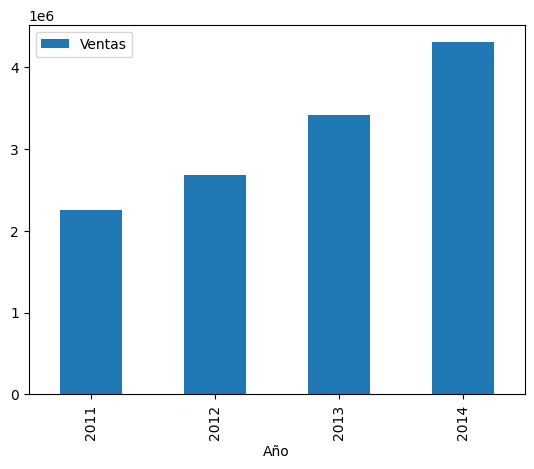

In [163]:
Super_Store_Sales.plot(x="Año", y="Ventas", kind="bar")
plt.show()


El comportamiento de las ventas en la tienda en ventas ha ido incrementando a lo largo de los años, por lo que se puede esperar un crecimiento del mismo estilo para el procimo año.

2. ¿Cuales han sido las fechas con más ordenes historicas?

In [139]:
Super_Store.groupby(['Order Date']).count().sort_values(['Order ID'],ascending=False).head(10)

,Unnamed: 0,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Store
Order Date,,,,,,,,,,,,,,,,,,,,,
2014-06-18,135,135,135,135,135,135,135,135,135,135,...,135,135,135,135,135,135,135,135,135,135
2014-11-18,127,127,127,127,127,127,127,127,127,127,...,127,127,127,127,127,127,127,127,127,127
2014-09-03,126,126,126,126,126,126,126,126,126,126,...,126,126,126,126,126,126,126,126,126,126
2014-11-20,118,118,118,118,118,118,118,118,118,118,...,118,118,118,118,118,118,118,118,118,118
2014-12-29,116,116,116,116,116,116,116,116,116,116,...,116,116,116,116,116,116,116,116,116,116
2014-12-10,114,114,114,114,114,114,114,114,114,114,...,114,114,114,114,114,114,114,114,114,114
2014-11-13,114,114,114,114,114,114,114,114,114,114,...,114,114,114,114,114,114,114,114,114,114
2014-12-26,110,110,110,110,110,110,110,110,110,110,...,110,110,110,110,110,110,110,110,110,110
2013-09-20,109,109,109,109,109,109,109,109,109,109,...,109,109,109,109,109,109,109,109,109,109


In [142]:
Super_Store_F = Super_Store.groupby('Order Date').filter(lambda x: len(x)> 100)


In [144]:
Super_Store_F['Order Date'].unique()

array(['2013-11-11T00:00:00.000000000', '2014-09-03T00:00:00.000000000',
       '2014-12-03T00:00:00.000000000', '2014-12-10T00:00:00.000000000',
       '2014-11-12T00:00:00.000000000', '2013-06-13T00:00:00.000000000',
       '2012-11-13T00:00:00.000000000', '2014-11-13T00:00:00.000000000',
       '2014-06-18T00:00:00.000000000', '2014-11-18T00:00:00.000000000',
       '2014-12-19T00:00:00.000000000', '2013-09-20T00:00:00.000000000',
       '2014-11-20T00:00:00.000000000', '2014-09-25T00:00:00.000000000',
       '2014-11-25T00:00:00.000000000', '2014-12-26T00:00:00.000000000',
       '2014-11-28T00:00:00.000000000', '2014-12-29T00:00:00.000000000'],
      dtype='datetime64[ns]')

<Axes: xlabel='count', ylabel='Order Date'>

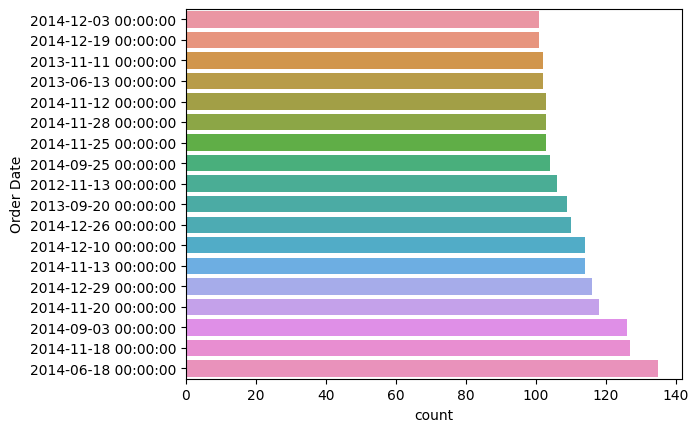

In [146]:
sns.countplot(y=Super_Store_F['Order Date'],order=Super_Store_F['Order Date'].value_counts(ascending=True).index )

Fechas con más ordenes historicas en los ultimos 4 años.

# Conclusiones

1. Es posible observar como se mantienen las tendencias de las subcategorias a lo largo de las fechas del dataset.
Incluso en el ultimo trimestre del año 2014 donde existen registro se mantienen el mismo orden de las categorias top:
    1. Blinders
    2. Storage
    3. Art
    4. Paper
    5. Chairs.

2. El crecimiento de las ventas anuales de la tienda sigue la misma tendencia según lo observado en la segunda pregunta, se esperaría un crecimiento similar a los ultimos años para las ventas del año 2015.

3. Los días que más se ha vendido en los ultimos 4 años, repiten multiples veces el año 2014, indicando que se han superado multiples veces los días de mayores ventas de años anteriores por días del año 2014.